# Проект 1: Классификация цветов Ирисов
------
### Задача
В этом проекте вы будете использовать данные о цветах ирисов для построения модели, которая сможет классифицировать цветок в один из трёх видов (Setosa, Versicolor, Virginica) на основе его характеристик (длина и ширина чашелистиков и лепестков).
Основные шаги:
* Загрузить набор данных о цветах ирисов (Iris dataset).
* Разделить данные на обучающую и тестовую выборки.
* Построить модель классификации с использованием метода ближайших соседей (K-Nearest Neighbors, KNN).
* Оценить точность модели на тестовой выборке.
------
### Список идентификаторов
| Имя переменной | Тип переменной | Смысл                                             |
|:--------------:|:--------------:|:-------------------------------------------------:|
| df             | dataset        | Набор данных                                      |
| X              | матрица        | Матрица признаков                                 |
| y              | вектор         | Cодержит названия видов цветков                   |
| species_map    | словарь        | Словарь для преобразования названий видов в числа |
| y_numeric      | вектор         | Вектор числовых меток видов цветков (0, 1, 2)     |
| n              | int            | Количество строк в матрице X (150)                |
| train_size     | in             | Размер обучающей выборки                          |
| shuffle_idx    | вектор         | Перемешивания данных                              |
| X_train        | матрица        | Обучающая выборка признаков                       |
| X_test         | матрица        | Тестовая выборка признаков                        |
| y_train        | вектор         | Обучающая выборка меток классов                   |
| y_test         | вектор         | Тестовая выборка меток классов                    |
| k              | int            | Количество ближайших соседей для алгоритма KNN    |
| y_pred         | вектор         | Вектор предсказанных классов на тестовой выборке  |
| accuracy       | float          | Точность модели KNN на тестовой выборке           |
------
### Код программы

In [ ]:
using Pkg
Pkg.add("RDatasets") 
Pkg.add("Plots") 
Pkg.add("Random") 
Pkg.add("StatsBase")

Точность модели: 30.0%


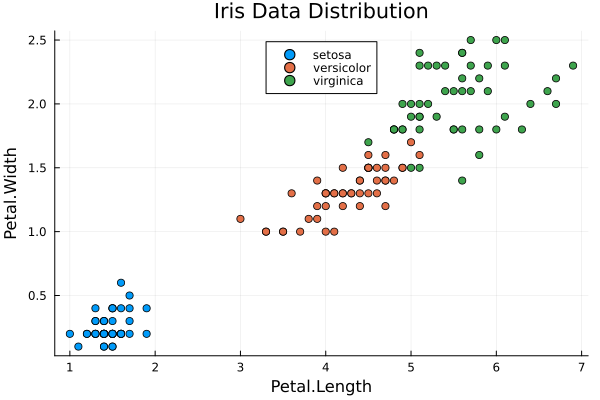

In [2]:
# Импортируем необходимые библиотеки
using RDatasets  # Для загрузки набора данных
using Plots  # Для построения графиков
using Random  # Для генерации случайных чисел при разделении выборок
using StatsBase  # Для функции countmap, которая поможет найти моду

# Шаг 1: Загрузка набора данных "Iris"
df = dataset("datasets", "iris")

# Разделение данных на признаки и метки классов
X = Matrix(df[:, 1:4])  # Признаки (длина и ширина чашелистиков и лепестков)
y = df[:, :Species]  # Метки классов (Setosa, Versicolor, Virginica)

# Преобразуем метки классов в числовые значения
species_map = Dict("setosa" => 0, "versicolor" => 1, "virginica" => 2)
y_numeric = [species_map[species] for species in y]

# Шаг 2: Разделение на обучающую и тестовую выборки
# Создаем индексы для случайного перемешивания данных
Random.seed!(123)  # Фиксируем сид для воспроизводимости
n = size(X, 1)
shuffle_idx = shuffle(1:n)

# Разделим на 80% для обучения и 20% для тестирования
train_size = Int(0.8 * n)
train_idx = shuffle_idx[1:train_size]
test_idx = shuffle_idx[train_size+1:end]

X_train, X_test = X[train_idx, :], X[test_idx, :]
y_train, y_test = y_numeric[train_idx], y_numeric[test_idx]

# Шаг 3: Реализация функции KNN с нахождением моды
# Функция для поиска моды (наиболее частого значения)
function mode(arr)
    counts = countmap(arr)  # Получаем частоты для каждого элемента
    return findmax(counts)[1]  # Возвращаем элемент с максимальной частотой
end

# Простая реализация KNN
function knn_classify(X_train, y_train, X_test, k)
    y_pred = []
    for i in 1:size(X_test, 1)
        # Вычисляем расстояние Евклида от каждого тестового объекта до всех объектов из обучающей выборки
        dists = [sum((X_train[j, :] .- X_test[i, :]).^2) for j in 1:size(X_train, 1)]
        # Находим индексы k ближайших соседей
        nearest = sortperm(dists)[1:k]
        # Получаем классы ближайших соседей
        nearest_classes = y_train[nearest]
        # Выбираем наиболее частый класс среди ближайших соседей (мода)
        push!(y_pred, mode(nearest_classes))
    end
    return y_pred
end

# Шаг 4: Оценка модели
k = 2  # Число ближайших соседей
y_pred = knn_classify(X_train, y_train, X_test, k)

# Оценка точности
accuracy = sum(y_pred .== y_test) / length(y_test)
println("Точность модели: ", accuracy * 100, "%")

# Шаг 5: Построение графика распределения
# Визуализируем данные (длина чашелистика и ширина чашелистика)
scatter(X[:, 3], X[:, 4], group=y, legend=:top, xlabel="Petal.Length", ylabel="Petal.Width", title="Iris Data Distribution")